In [ ]:
import joblib
import numpy as np

In [ ]:
# Load the trained linear SVM model
best_model = joblib.load('best_linear_svm_model.pkl')

# Extract the vectorizer and LinearSVC from the pipeline
vectorizer = best_model.named_steps['tfidf']
svm = best_model.named_steps['svc']

# Get the feature names and their coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = svm.coef_.toarray()[0]

# Sort the coefficients
sorted_indices = np.argsort(coefficients)
top_positive_indices = sorted_indices[-50:]
top_negative_indices = sorted_indices[:50]

print("Top positive features:")
for idx in top_positive_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]}")

print("\nTop negative features:")
for idx in top_negative_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]}")

Top positive features:
handy: 2.0569298062728656
thanks: 2.059124572074745
nicebut: 2.065349055331952
live: 2.0678203470130554
ty: 2.0924785854123953
amaze: 2.0991744397260974
minor: 2.106641499725489
improved: 2.1257771193011514
sometimes: 2.1390915607920196
five: 2.167142638456098
appreciate: 2.182742965271741
dope: 2.2266937112262424
pretty: 2.233840148223031
enjoying: 2.2814845652226325
phenomenal: 2.3104207340538827
awsome: 2.317506813980169
beat: 2.3389075961261456
beautiful: 2.3482862192164835
flawlessly: 2.379554346862422
besides: 2.5147100620115936
cool: 2.5335991088705088
overall: 2.6038290877868677
luv: 2.621889219909808
perfection: 2.6385384500449804
fabulous: 2.641064058308265
complain: 2.704803028198273
mast: 2.720341260904408
solid: 2.724393404197816
wonderful: 2.7676394932024917
brilliant: 2.7910534012901524
thank: 2.824208785405445
loving: 2.8363829457895506
four: 2.84874339418558
downside: 2.8864205679889228
helped: 2.9583472545974585
lovely: 2.9592940260073557
perfec

## Word Cloud

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'feature_names' and 'coefficients' are already defined as in your original code
# Sort the coefficients and get the top positive and negative indices
sorted_indices = np.argsort(coefficients)
top_positive_indices = sorted_indices[-50:]
top_negative_indices = sorted_indices[:50]

# Create a DataFrame for positive features
positive_features = pd.DataFrame({
    'Feature': [feature_names[idx] for idx in top_positive_indices],
    'Coefficient': [coefficients[idx] for idx in top_positive_indices]
})

# Create a DataFrame for negative features
negative_features = pd.DataFrame({
    'Feature': [feature_names[idx] for idx in top_negative_indices],
    'Coefficient': [coefficients[idx] for idx in top_negative_indices]
})

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

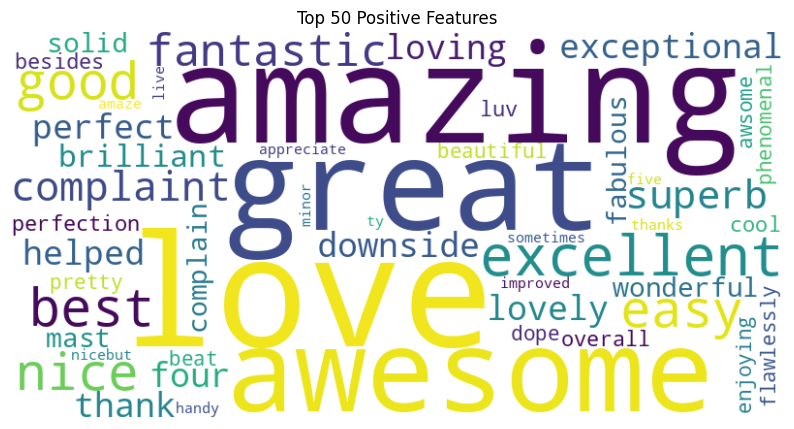

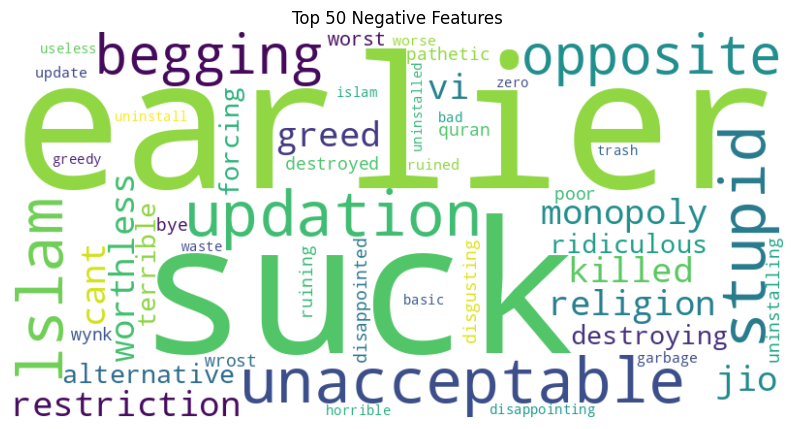

In [ ]:
# Create word cloud for positive features
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(positive_features['Feature'], positive_features['Coefficient']))
)

# Create word cloud for negative features
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(negative_features['Feature'], negative_features['Coefficient']))
)

# Plot positive word cloud
plt.figure(figsize=(10, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Top 50 Positive Features')
plt.axis('off')
plt.show()

# Plot negative word cloud
plt.figure(figsize=(10, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Top 50 Negative Features')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('data_preprocessing_spotify.csv')

In [ ]:
data

,source,review content,score,appVersion,processed_review
0,Google Play,Can find great songs from every decade. Also a...,5,8.9.50.552,find great song every decade also good selecti...
1,Google Play,HIDDEN MUSIC STILL GETS PLAYED. Useless app,1,8.9.50.552,hidden music still get played useless app
2,Google Play,Amazing app. Love listening to music on it on ...,5,8.9.50.552,amazing app love listening music daily
3,Google Play,Excellent great selection,5,8.9.50.552,excellent great selection
4,Google Play,All the reviewers have same problem just add👎t...,1,8.9.50.552,reviewer problem addthat sit dont explain anyo...
...,...,...,...,...,...
295748,App Store,Good NO MORE ADDS PLEAAAAAAAAASE,2,NaN,good add pleaaaaaaaaase
295749,App Store,Good G h,4,NaN,good g h
295750,App Store,GRRRR THIS WILL BE THE DEATH OF ME WHAT ARE TH...,1,NaN,grrrr death ad man
295751,App Store,… CMON SHAKE THAT MONKEY 😝😝,5,NaN,cmon shake monkey


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

## Positive

### love

In [ ]:
# Assuming your data is loaded into a DataFrame named `data`
# Filter reviews containing the word "love"
love_reviews = data[data['processed_review'].str.contains('love', case=False, na=False)]

# Combine all reviews into a single text for analysis
love_reviews_text = " ".join(love_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([love_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'love':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")


Top 10 most frequent words/phrases in reviews mentioning 'love':
love: 25804
app: 17091
music: 13057
song: 12359
spotify: 11462
love app: 5532
premium: 5468
listen: 4719
like: 4575
love spotify: 4366


### amazing

In [ ]:
# Filter reviews containing the word "amazing"
amazing_reviews = data[data['processed_review'].str.contains('amazing', case=False, na=False)]

# Combine all reviews into a single text for analysis
amazing_reviews_text = " ".join(amazing_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([amazing_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'amazing':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'amazing':
amazing: 6060
app: 4104
song: 2562
music: 2493
spotify: 1694
premium: 1282
love: 1271
amazing app: 1256
listen: 1000
app amazing: 871


### easy

In [ ]:
# Assuming your data is loaded into a DataFrame named `data`
# Filter reviews containing the word "easy"
easy_reviews = data[data['processed_review'].str.contains('easy', case=False, na=False)]

# Combine all reviews into a single text for analysis
easy_reviews_text = " ".join(easy_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([easy_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'easy':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'easy':
easy: 4453
use: 2333
music: 2102
easy use: 1968
app: 1932
song: 1580
spotify: 1085
love: 947
great: 834
playlist: 706


### beat

In [ ]:
# Assuming your data is loaded into a DataFrame named `data`
# Filter reviews containing the word "beat"
beat_reviews = data[data['processed_review'].str.contains('beat', case=False, na=False)]

# Combine all reviews into a single text for analysis
beat_reviews_text = " ".join(beat_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([beat_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'beat':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'beat':
beat: 346
music: 302
app: 238
spotify: 208
song: 199
like: 89
premium: 83
love: 73
listen: 67
playlist: 66


### best

In [ ]:
# Filter reviews containing the word "best"
best_reviews = data[data['processed_review'].str.contains('best', case=False, na=False)]

# Combine all reviews into a single text for analysis
best_reviews_text = " ".join(best_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([best_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'best':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'best':
best: 22023
app: 18982
music: 15061
song: 8838
best music: 6928
spotify: 6520
premium: 5395
best app: 5007
music app: 5002
update: 3720


## Negative

### earlier

In [ ]:
# Filter reviews containing the word "earlier"
earlier_reviews = data[data['processed_review'].str.contains('earlier', case=False, na=False)]

# Combine all reviews into a single text for analysis
earlier_reviews_text = " ".join(earlier_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([earlier_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'earlier':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'earlier':
earlier: 1334
song: 1334
app: 1331
premium: 830
spotify: 677
music: 525
update: 508
play: 484
good: 437
listen: 367


### unacceptable

In [ ]:
# Filter reviews containing the word "unacceptable"
unacceptable_reviews = data[data['processed_review'].str.contains('unacceptable', case=False, na=False)]

# Combine all reviews into a single text for analysis
unacceptable_reviews_text = " ".join(unacceptable_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([unacceptable_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'unacceptable':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'unacceptable':
unacceptable: 246
app: 201
song: 155
premium: 130
music: 105
spotify: 101
play: 66
ad: 65
update: 61
playlist: 49


### updation

In [ ]:
# Filter reviews containing the word "updation"
updation_reviews = data[data['processed_review'].str.contains('updation', case=False, na=False)]

# Combine all reviews into a single text for analysis
updation_reviews_text = " ".join(updation_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([updation_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'updation':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'updation':
updation: 289
app: 220
song: 181
new: 152
new updation: 108
worst: 103
premium: 94
music: 84
spotify: 82
like: 70


### monopoly

In [ ]:
# Filter reviews containing the word "monopoly"
monopoly_reviews = data[data['processed_review'].str.contains('monopoly', case=False, na=False)]

# Combine all reviews into a single text for analysis
monopoly_reviews_text = " ".join(monopoly_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([monopoly_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'monopoly':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'monopoly':
monopoly: 112
song: 76
app: 76
music: 63
spotify: 62
premium: 34
dont: 33
like: 32
feature: 29
user: 25


### Islam

In [ ]:
# Filter reviews containing the word "Islam"
islam_reviews = data[data['processed_review'].str.contains('Islam', case=False, na=False)]

# Combine all reviews into a single text for analysis
islam_reviews_text = " ".join(islam_reviews['processed_review'].values)

# Create a CountVectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform([islam_reviews_text])  # Fit and transform the text data

# Get the words and their frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent n-grams
print("Top 10 most frequent words/phrases in reviews mentioning 'Islam':")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most frequent words/phrases in reviews mentioning 'Islam':
islam: 202
love: 103
hate: 97
love islam: 91
islam hate: 58
application: 56
app: 54
sweden: 51
hate application: 46
power: 27
